In [2]:
import torch
import numpy as np
import pandas as pd
import glob
import os
from sklearn.decomposition import PCA, KernelPCA

from torch.utils.data import TensorDataset, DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch import nn
from torch import optim
import torchvision.transforms as tr
import matplotlib.pyplot as plt

import time

In [3]:
path = 'C:/Users/kbj/Downloads/data/train/x/'
data_train_x_list = os.listdir('C:/Users/kbj/Downloads/data/train/x/')
path = 'C:/Users/kbj/Downloads/data/train/x/'
x_train_mean = np.array([])
x_train_var = np.array([])
x_train_std = np.array([])
x_train_max = np.array([])
x_train_min = np.array([])

for i in data_train_x_list:
    df = pd.read_csv(path+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    x_train_mean = np.append(x_train_mean, mean)
    x_train_var = np.append(x_train_var, var)
    x_train_std = np.append(x_train_std, std)
    x_train_max = np.append(x_train_max, max)
    x_train_min = np.append(x_train_min, min)

x_train_feature = np.concatenate((x_train_mean.reshape(-1,1), x_train_var.reshape(-1,1), x_train_std.reshape(-1,1), x_train_max.reshape(-1,1), x_train_min.reshape(-1,1)), axis=1)
x_train_feature.shape

(700, 5)

In [4]:
path = 'C:/Users/kbj/Downloads/data/train/y/'
data_train_y_list = os.listdir('C:/Users/kbj/Downloads/data/train/y/')
path = 'C:/Users/kbj/Downloads/data/train/y/'
y_train_mean = np.array([])
y_train_var = np.array([])
y_train_std = np.array([])
y_train_max = np.array([])
y_train_min = np.array([])

for i in data_train_y_list:
    df = pd.read_csv(path+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    y_train_mean = np.append(y_train_mean, mean)
    y_train_var = np.append(y_train_var, var)
    y_train_std = np.append(y_train_std, std)
    y_train_max = np.append(y_train_max, max)
    y_train_min = np.append(y_train_min, min)

y_train_feature = np.concatenate((y_train_mean.reshape(-1,1), y_train_var.reshape(-1,1), y_train_std.reshape(-1,1), y_train_max.reshape(-1,1), y_train_min.reshape(-1,1)), axis=1)
y_train_feature.shape

(700, 5)

In [5]:
path = 'C:/Users/kbj/Downloads/data/train/z/'
data_train_z_list = os.listdir('C:/Users/kbj/Downloads/data/train/z/')
path = 'C:/Users/kbj/Downloads/data/train/z/'
z_train_mean = np.array([])
z_train_var = np.array([])
z_train_std = np.array([])
z_train_max = np.array([])
z_train_min = np.array([])

for i in data_train_z_list:
    df = pd.read_csv(path+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    z_train_mean = np.append(z_train_mean, mean)
    z_train_var = np.append(z_train_var, var)
    z_train_std = np.append(z_train_std, std)
    z_train_max = np.append(z_train_max, max)
    z_train_min = np.append(z_train_min, min)

z_train_feature = np.concatenate((z_train_mean.reshape(-1,1), z_train_var.reshape(-1,1), z_train_std.reshape(-1,1), z_train_max.reshape(-1,1), z_train_min.reshape(-1,1)), axis=1)
z_train_feature.shape

(700, 5)

In [6]:
path = 'C:/Users/kbj/Downloads/data/train/e/'
data_train_e_list = os.listdir('C:/Users/kbj/Downloads/data/train/e/')
path = 'C:/Users/kbj/Downloads/data/train/e/'
e_train_mean = np.array([])
e_train_var = np.array([])
e_train_std = np.array([])
e_train_max = np.array([])
e_train_min = np.array([])

for i in data_train_e_list:
    df = pd.read_csv(path+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    e_train_mean = np.append(e_train_mean, mean)
    e_train_var = np.append(e_train_var, var)
    e_train_std = np.append(e_train_std, std)
    e_train_max = np.append(e_train_max, max)
    e_train_min = np.append(e_train_min, min)

e_train_feature = np.concatenate((e_train_mean.reshape(-1,1), e_train_var.reshape(-1,1), e_train_std.reshape(-1,1), e_train_max.reshape(-1,1), e_train_min.reshape(-1,1)), axis=1)
e_train_feature.shape



(700, 5)

In [7]:
#xyz_train_feature = np.sqrt(np.square(x_train_feature[:,0])+np.square(y_train_feature[:,0])+np.square(z_train_feature[:,0]))
#xyz_train_feature = xyz_train_feature.reshape(-1,1)
#all_train_feature = np.concatenate((x_train_feature, y_train_feature, z_train_feature, e_train_feature, xyz_train_feature), axis=1)
all_train_feature = np.concatenate((x_train_feature, y_train_feature, z_train_feature, e_train_feature), axis=1)
all_train_feature.shape

(700, 20)

In [8]:
train_label = pd.read_csv('C:/Users/kbj/Downloads/data/train/train_label.csv', header=None)
train_label = train_label.to_numpy()

train_label.shape

(700, 1)

In [9]:
path_x = 'C:/Users/kbj/Downloads/data/test/x/'
data_test_x_list = os.listdir('C:/Users/kbj/Downloads/data/test/x/')
x_test_mean = np.array([])
x_test_var = np.array([])
x_test_std = np.array([])
x_test_max = np.array([])
x_test_min = np.array([])

for i in data_test_x_list:
    df = pd.read_csv(path_x+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    x_test_mean = np.append(x_test_mean, mean)
    x_test_var = np.append(x_test_var, var)
    x_test_std = np.append(x_test_std, std)
    x_test_max = np.append(x_test_max, max)
    x_test_min = np.append(x_test_min, min)

x_test_feature = np.concatenate((x_test_mean.reshape(-1,1), x_test_var.reshape(-1,1), x_test_std.reshape(-1,1), x_test_max.reshape(-1,1), x_test_min.reshape(-1,1)), axis=1)
print(x_test_feature.shape)

path_y = 'C:/Users/kbj/Downloads/data/test/y/'
data_test_y_list = os.listdir('C:/Users/kbj/Downloads/data/test/y/')
y_test_mean = np.array([])
y_test_var = np.array([])
y_test_std = np.array([])
y_test_max = np.array([])
y_test_min = np.array([])

for i in data_test_y_list:
    df = pd.read_csv(path_y+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    y_test_mean = np.append(y_test_mean, mean)
    y_test_var = np.append(y_test_var, var)
    y_test_std = np.append(y_test_std, std)
    y_test_max = np.append(y_test_max, max)
    y_test_min = np.append(y_test_min, min)

y_test_feature = np.concatenate((y_test_mean.reshape(-1,1), y_test_var.reshape(-1,1), y_test_std.reshape(-1,1), y_test_max.reshape(-1,1), y_test_min.reshape(-1,1)), axis=1)
print(y_test_feature.shape)

path_z = 'C:/Users/kbj/Downloads/data/test/z/'
data_test_z_list = os.listdir('C:/Users/kbj/Downloads/data/test/z/')
z_test_mean = np.array([])
z_test_var = np.array([])
z_test_std = np.array([])
z_test_max = np.array([])
z_test_min = np.array([])

for i in data_test_z_list:
    df = pd.read_csv(path_z+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    z_test_mean = np.append(z_test_mean, mean)
    z_test_var = np.append(z_test_var, var)
    z_test_std = np.append(z_test_std, std)
    z_test_max = np.append(z_test_max, max)
    z_test_min = np.append(z_test_min, min)

z_test_feature = np.concatenate((z_test_mean.reshape(-1,1), z_test_var.reshape(-1,1), z_test_std.reshape(-1,1), z_test_max.reshape(-1,1), z_test_min.reshape(-1,1)), axis=1)
print(z_test_feature.shape)

path_e = 'C:/Users/kbj/Downloads/data/test/e/'
data_test_e_list = os.listdir('C:/Users/kbj/Downloads/data/test/e/')
e_test_mean = np.array([])
e_test_var = np.array([])
e_test_std = np.array([])
e_test_max = np.array([])
e_test_min = np.array([])

for i in data_test_e_list:
    df = pd.read_csv(path_e+i, header=None)
    mean = np.mean(df.to_numpy())
    var = np.var(df.to_numpy())
    std = np.std(df.to_numpy())
    max = np.max(df.to_numpy())
    min = np.min(df.to_numpy())
    e_test_mean = np.append(e_test_mean, mean)
    e_test_var = np.append(e_test_var, var)
    e_test_std = np.append(e_test_std, std)
    e_test_max = np.append(e_test_max, max)
    e_test_min = np.append(e_test_min, min)

e_test_feature = np.concatenate((e_test_mean.reshape(-1,1), e_test_var.reshape(-1,1), e_test_std.reshape(-1,1), e_test_max.reshape(-1,1), e_test_min.reshape(-1,1)), axis=1)
print(e_test_feature.shape)

#xyz_test_feature = np.sqrt(np.square(x_test_feature[:,0])+np.square(y_test_feature[:,0])+np.square(z_test_feature[:,0]))
#xyz_test_feature = xyz_test_feature.reshape(-1,1)
#all_test_feature = np.concatenate((x_test_feature, y_test_feature, z_test_feature, e_test_feature, xyz_test_feature), axis=1)

all_test_feature = np.concatenate((x_test_feature, y_test_feature, z_test_feature, e_test_feature), axis=1)
print(all_test_feature.shape)

test_label = pd.read_csv('C:/Users/kbj/Downloads/data/test/test_label.csv', header=None)
test_label = test_label.to_numpy()

print(test_label.shape)

(1400, 5)
(1400, 5)
(1400, 5)
(1400, 5)
(1400, 20)
(1400, 1)


In [10]:
print(all_train_feature.shape)
print(train_label.shape)

print(all_test_feature.shape)
print(test_label.shape)


(700, 20)
(700, 1)
(1400, 20)
(1400, 1)


In [11]:
X_train = torch.Tensor(all_train_feature)
Y_train = torch.LongTensor(train_label.reshape(-1))
X_test = torch.Tensor(all_test_feature)
Y_test = torch.LongTensor(test_label.reshape(-1))

ds_train = TensorDataset(X_train, Y_train)
ds_test = TensorDataset(X_test, Y_test)

loader_train = DataLoader(ds_train, batch_size=128, shuffle=True)
loader_test = DataLoader(ds_test, shuffle=False)

In [12]:
linear1 = torch.nn.Linear(20,64, bias=True)
linear2 = torch.nn.Linear(64,256, bias=True)
linear3 = torch.nn.Linear(256,128, bias=True)
linear4 = torch.nn.Linear(128,8, bias=True)
#linear5 = torch.nn.Linear(128,32, bias=True)
#linear6 = torch.nn.Linear(32,8, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=0.1)

model1 = torch.nn.Sequential(linear1, relu, dropout,
                           linear2, relu, dropout,
                           linear3, relu, dropout,
                           linear4)

model = torch.nn.Sequential(linear1, relu, 
                           linear2, relu, 
                           linear3, relu, 
                           linear4)

In [13]:
# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model1.parameters(), lr=0.01, weight_decay=1e-5)

losses=[]

In [14]:
start_time = time.time()
epoch_num = 10000
for epoch in range(epoch_num):
    for X,Y in loader_train:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, Y)
        loss.backward()
        optimizer.step()
    
    if epoch%100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch,epoch_num,loss.item()))
    losses.append(loss.item())

duration=time.time()-start_time
print(duration)

Epoch    0/10000 Cost: 2.000527
Epoch  100/10000 Cost: 0.907854
Epoch  200/10000 Cost: 0.624629
Epoch  300/10000 Cost: 0.679142
Epoch  400/10000 Cost: 0.506508
Epoch  500/10000 Cost: 0.718553
Epoch  600/10000 Cost: 0.653394
Epoch  700/10000 Cost: 0.427833
Epoch  800/10000 Cost: 0.449224
Epoch  900/10000 Cost: 0.366225
Epoch 1000/10000 Cost: 0.270380
Epoch 1100/10000 Cost: 0.666037
Epoch 1200/10000 Cost: 0.329103
Epoch 1300/10000 Cost: 0.462382
Epoch 1400/10000 Cost: 0.350375
Epoch 1500/10000 Cost: 0.404323
Epoch 1600/10000 Cost: 0.305279
Epoch 1700/10000 Cost: 0.450613
Epoch 1800/10000 Cost: 0.282192
Epoch 1900/10000 Cost: 0.236652
Epoch 2000/10000 Cost: 0.274313
Epoch 2100/10000 Cost: 0.338451
Epoch 2200/10000 Cost: 0.224587
Epoch 2300/10000 Cost: 0.683173
Epoch 2400/10000 Cost: 0.136464
Epoch 2500/10000 Cost: 0.137829
Epoch 2600/10000 Cost: 0.177039
Epoch 2700/10000 Cost: 0.128236
Epoch 2800/10000 Cost: 0.135933
Epoch 2900/10000 Cost: 0.073263
Epoch 3000/10000 Cost: 0.184844
Epoch 31

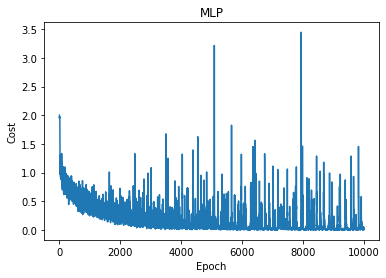

In [15]:
plt.plot(losses)
plt.figure(1)
plt.title('MLP')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [16]:
correct = 0
total = 0
pre=[]
with torch.no_grad():
    for data in loader_test:
        X, Y = data
        outputs = model(X)
        _, predicted = torch.max(outputs.data, 1)
        total += Y.size(0)
        correct += (predicted == Y).sum().item()
        predicted = predicted.tolist()
        pre.append(predicted)
        
print('Accuracy of the network on the 1400 test data: %.2f %%' %(100 * correct / total))
print('맞춘 개수: %d개' %correct)
print('전체 데이터 개수: %d개' %total)

Accuracy of the network on the 1400 test data: 86.50 %
맞춘 개수: 1211개
전체 데이터 개수: 1400개


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_label.reshape(-1),pre))

[[149  19   4   0   0   0  28]
 [ 11 168   3   1   1   0  16]
 [ 21   0 161  14   0   0   4]
 [  0   7  11 181   0   1   0]
 [  0   0   0   0 194   6   0]
 [  0   0   0   0   2 198   0]
 [ 17  18   4   0   0   1 160]]
